In [7]:
# from qutip import * 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.constants import pi,hbar, h, e
from scipy import optimize
import sympy as sp
import utils.qubit_analysis as qubit

In [2]:
#input parameters 
LJ = 10e-9
L = 6.596e-9
CJ=100.131e-15
phi_g = 0.6*pi

In [3]:
#defining Ej,El,Ec
levels = 20
EJ = (hbar/2/e)**2/(LJ*h)/1e9 
EL = (hbar/2/e)**2/(L*h)/1e9 
EC = e**2/(2*CJ*h)/1e9
print(EJ,EL,EC)

16.34615128067812 24.781915222374348 0.19344887522005297


In [4]:
####Enter in form of potential here####
def U(phi,phi_g):
    return EJ*sp.cos(phi+phi_g)+1/2*EL*phi**2

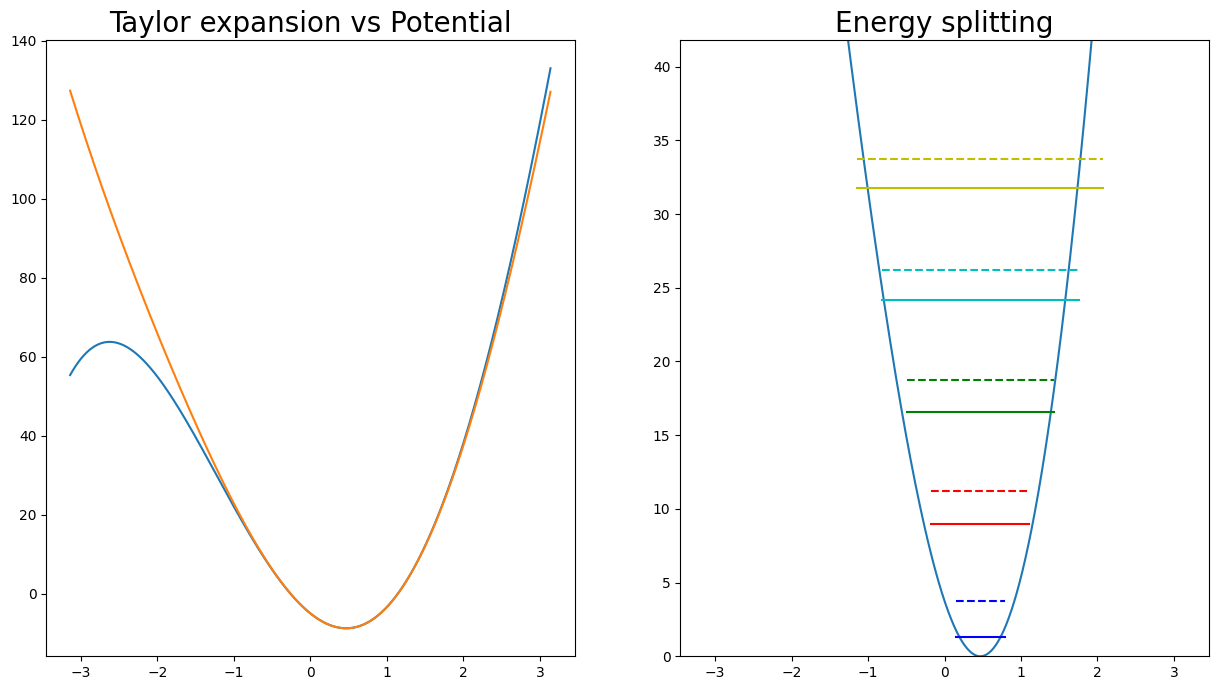

In [9]:
###run for plots###

l, anh, omega_0, UTaylor, phi_zpf, phi_star = qubit.finding_Qubit(phi_g)
der1, der2, der3, der4 = qubit.finding_derivatives(phi_g)

phi = sp.Symbol('phi')
der1plot = sp.lambdify(phi,der1)
der2plot = sp.lambdify(phi,der2)
der3plot = sp.lambdify(phi,der3)
der4plot = sp.lambdify(phi,der4)


phi_values = np.arange(-pi, pi , 0.001*pi)
Uplot = sp.lambdify(phi, U(phi, phi_g))

fig, axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (15,8)

axs[0].plot(phi_values, UTaylor(phi_values))
axs[0].plot(phi_values,Uplot(phi_values))
axs[0].set_title('Taylor expansion vs Potential', fontsize = 20)
axs[1].plot(phi_values, Uplot(phi_values)-Uplot(phi_star))
axs[1].plot([phi_star-1*phi_zpf,phi_star+1*phi_zpf],[l[0],l[0]],'b',[phi_star-1*phi_zpf,phi_star+1*phi_zpf],[omega_0/2, omega_0/2], 'b--')
axs[1].plot([phi_star-2*phi_zpf,phi_star+2*phi_zpf],[l[1],l[1]],'r',[phi_star-2*phi_zpf,phi_star+2*phi_zpf],[omega_0*3/2, omega_0*3/2], 'r--')
axs[1].plot([phi_star-3*phi_zpf,phi_star+3*phi_zpf],[l[2],l[2]],'g',[phi_star-3*phi_zpf,phi_star+3*phi_zpf],[omega_0*5/2, omega_0*5/2], 'g--')
axs[1].plot([phi_star-4*phi_zpf,phi_star+4*phi_zpf],[l[3],l[3]],'c',[phi_star-4*phi_zpf,phi_star+4*phi_zpf],[omega_0*7/2, omega_0*7/2], 'c--')
axs[1].plot([phi_star-5*phi_zpf,phi_star+5*phi_zpf],[l[4],l[4]],'y',[phi_star-5*phi_zpf,phi_star+5*phi_zpf],[omega_0*9/2, omega_0*9/2], 'y--')
axs[1].set_title('Energy splitting', fontsize = 20)

axs[1].set_ylim([0,l[4]+10])

with open("output.txt", "a") as f:
    print("EJ = %.3f GHz "%(EJ),"LJ=%.3f nH" %(LJ*1e9), file = f)
    print("EL = %.3f GHz"%(EL),"L=%.3f nH"%(L*1e9), file = f)
    print("EC = %.3f GHz"%(EC),"CJ=%.3f fF"%(CJ*1e15), file = f)
    print("(EL-EJ)/EC=%.3f"%((EL-EJ)/EC), file = f)
    print("Phase shift due to magnetic field %.3f"%(phi_g), file = f)

    print("Main frequency %.3f GHz"%(l[1]-l[0]), file = f)
    print("Anharmonicity %.3f GHz"%(l[2]-2*l[1]+l[0]), file = f)

plt.savefig("output.jpg")

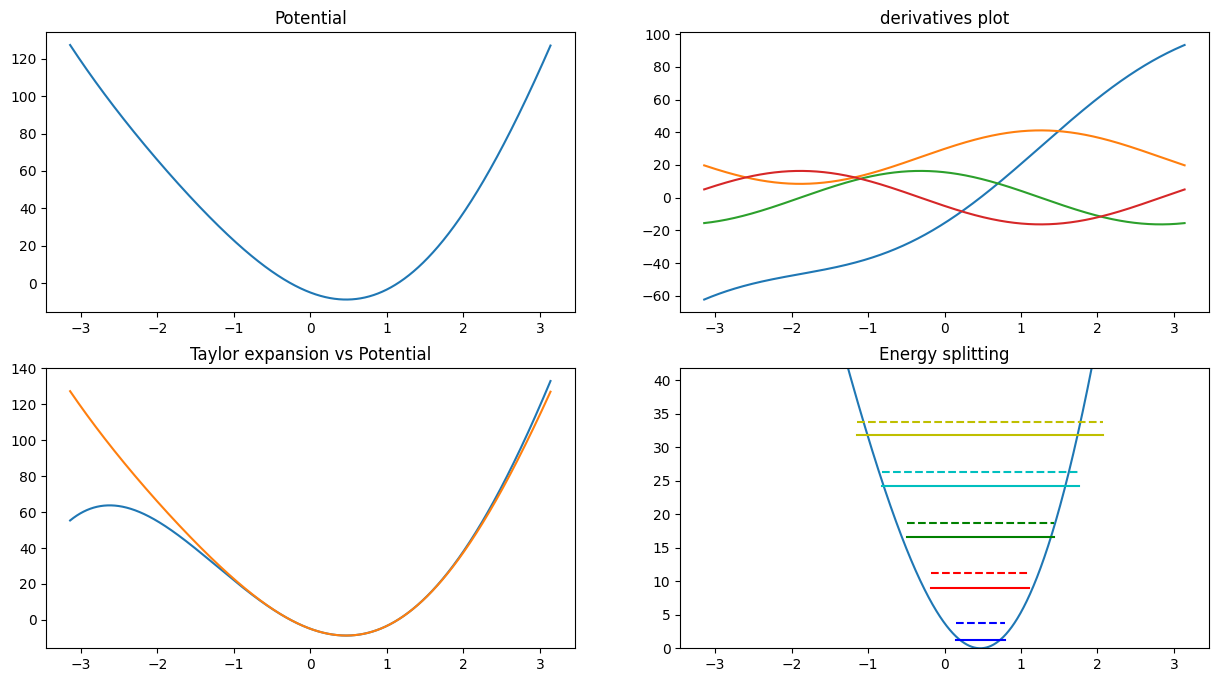

In [10]:
###run for plots###

l, anh, omega_0, UTaylor, phi_zpf, phi_star = qubit.finding_Qubit(phi_g)
der1, der2, der3, der4 = qubit.finding_derivatives(phi_g)

phi = sp.Symbol('phi')
der1plot = sp.lambdify(phi,der1)
der2plot = sp.lambdify(phi,der2)
der3plot = sp.lambdify(phi,der3)
der4plot = sp.lambdify(phi,der4)


phi_values = np.arange(-pi, pi , 0.001*pi)
Uplot = sp.lambdify(phi, U(phi, phi_g))

fig, axs = plt.subplots(2,2)
plt.rcParams["figure.figsize"] = (15,15)

axs[0,0].plot(phi_values,Uplot(phi_values))
axs[0,0].set_title('Potential')
axs[0,1].plot(phi_values,der1plot(phi_values))
axs[0,1].plot(phi_values,der2plot(phi_values))
axs[0,1].plot(phi_values,der3plot(phi_values))
axs[0,1].plot(phi_values,der4plot(phi_values))
axs[0,1].set_title('derivatives plot')
axs[1,0].plot(phi_values, UTaylor(phi_values))
axs[1,0].plot(phi_values,Uplot(phi_values))
axs[1,0].set_title('Taylor expansion vs Potential')
axs[1,1].plot(phi_values, Uplot(phi_values)-Uplot(phi_star))
axs[1,1].plot([phi_star-1*phi_zpf,phi_star+1*phi_zpf],[l[0],l[0]],'b',[phi_star-1*phi_zpf,phi_star+1*phi_zpf],[omega_0/2, omega_0/2], 'b--')
axs[1,1].plot([phi_star-2*phi_zpf,phi_star+2*phi_zpf],[l[1],l[1]],'r',[phi_star-2*phi_zpf,phi_star+2*phi_zpf],[omega_0*3/2, omega_0*3/2], 'r--')
axs[1,1].plot([phi_star-3*phi_zpf,phi_star+3*phi_zpf],[l[2],l[2]],'g',[phi_star-3*phi_zpf,phi_star+3*phi_zpf],[omega_0*5/2, omega_0*5/2], 'g--')
axs[1,1].plot([phi_star-4*phi_zpf,phi_star+4*phi_zpf],[l[3],l[3]],'c',[phi_star-4*phi_zpf,phi_star+4*phi_zpf],[omega_0*7/2, omega_0*7/2], 'c--')
axs[1,1].plot([phi_star-5*phi_zpf,phi_star+5*phi_zpf],[l[4],l[4]],'y',[phi_star-5*phi_zpf,phi_star+5*phi_zpf],[omega_0*9/2, omega_0*9/2], 'y--')
axs[1,1].set_title('Energy splitting')

axs[1,1].set_ylim([0,l[4]+10])

with open("output.txt", "a") as f:
    print("EJ = %.3f GHz "%(EJ),"LJ=%.3f nH" %(LJ*1e9), file = f)
    print("EL = %.3f GHz"%(EL),"L=%.3f nH"%(L*1e9), file = f)
    print("EC = %.3f GHz"%(EC),"CJ=%.3f fF"%(CJ*1e15), file = f)
    print("(EL-EJ)/EC=%.3f"%((EL-EJ)/EC), file = f)
    print("Phase shift due to magnetic field %.3f"%(phi_g), file = f)

    print("Main frequency %.3f GHz"%(l[1]-l[0]), file = f)
    print("Anharmonicity %.3f GHz"%(l[2]-2*l[1]+l[0]), file = f)

plt.savefig("output.jpg")

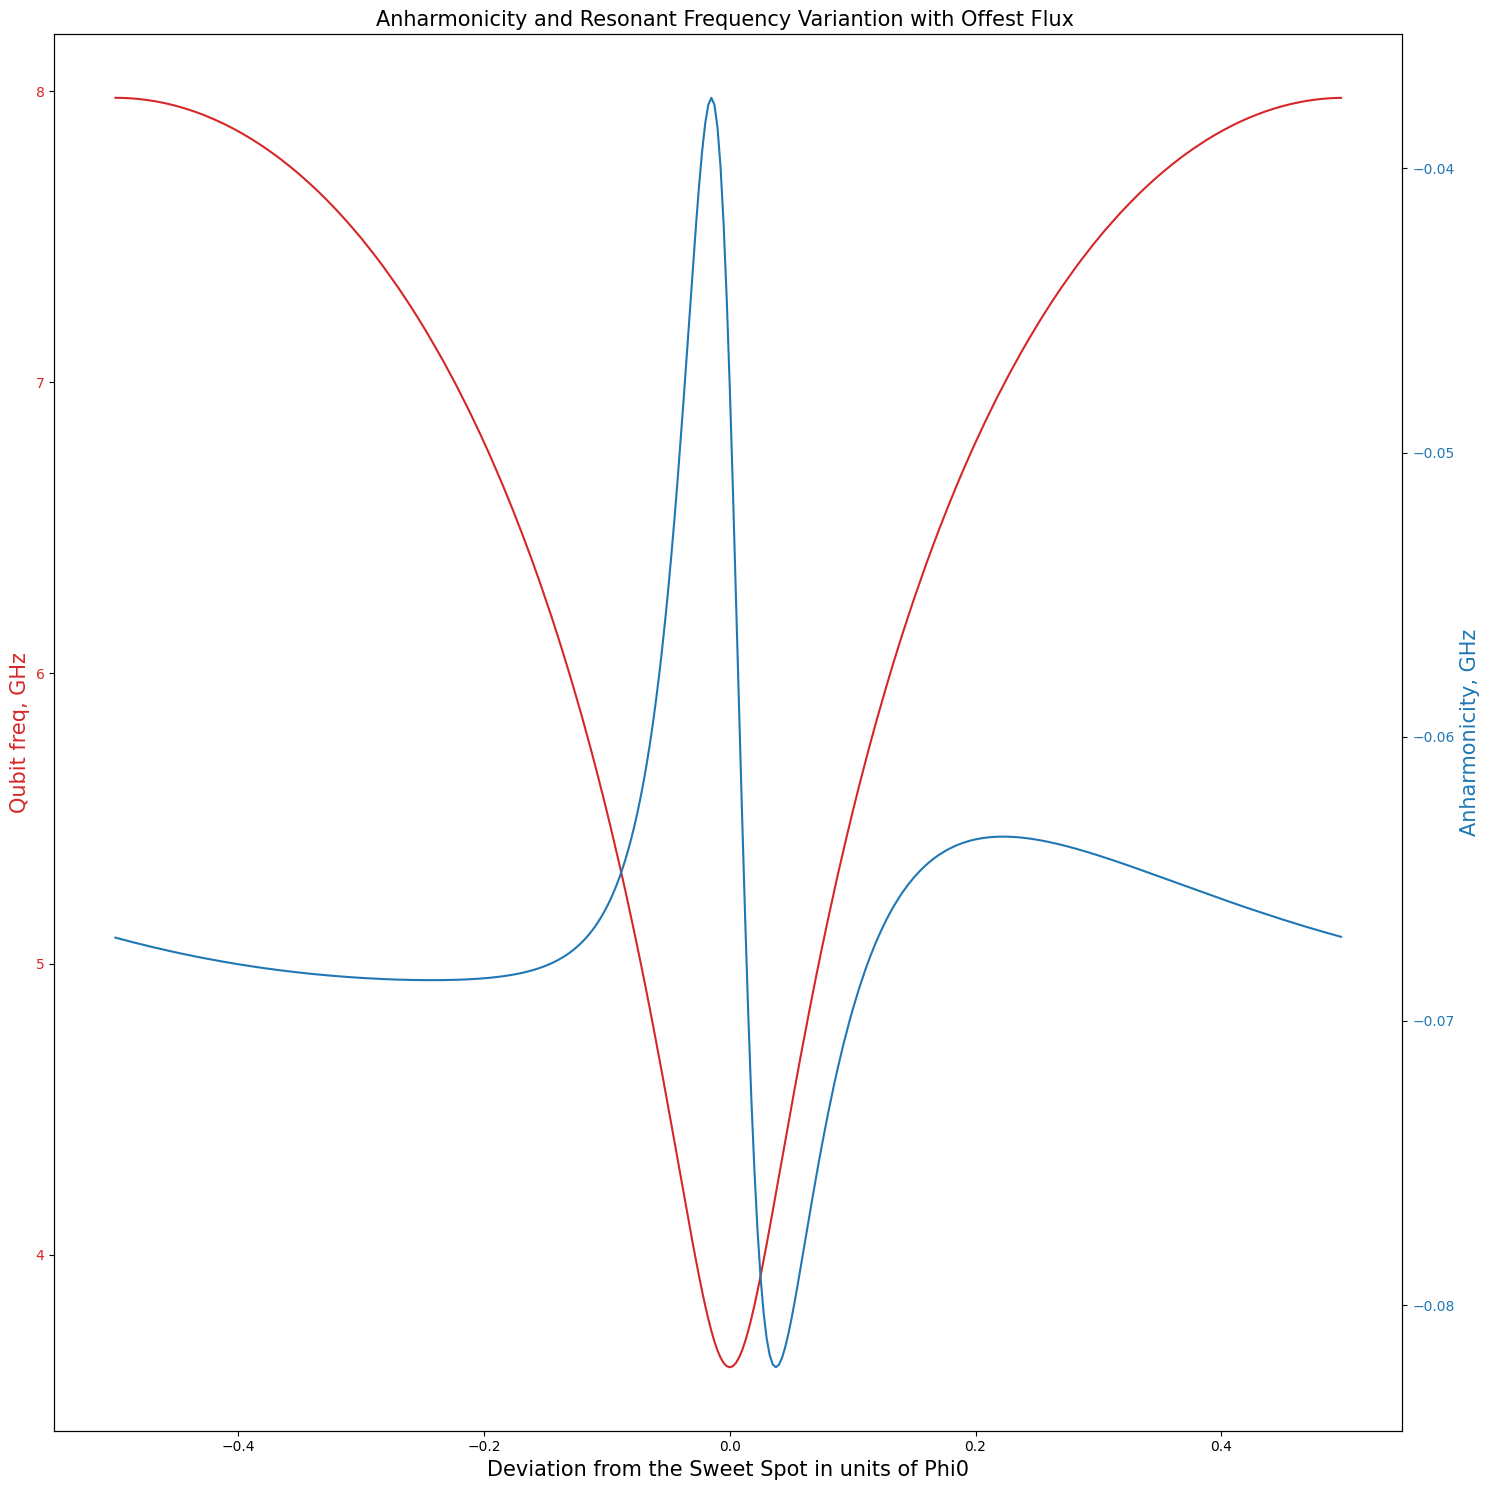

In [11]:
###Sensitivity to magnetic field###
omega_0_ar=[]
anh_ar=[]
phi_g_sweep = np.arange(-1*pi,1*pi, 0.005*pi)
for phi_g in phi_g_sweep:
    l, anh, omega_0, UTaylor, phi_zpf, phi_star = qubit.finding_Qubit(phi_g)
    omega_0_ar.append(omega_0)
    anh_ar.append(anh)
    

fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Anharmonicity and Resonant Frequency Variantion with Offest Flux ', fontsize = 15)


color = 'tab:red'
ax1.set_xlabel('Deviation from the Sweet Spot in units of Phi0', fontsize = 15)
ax1.set_ylabel('Qubit freq, GHz', fontsize =15, color=color)
ax1.plot(phi_g_sweep/(2*pi), omega_0_ar, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Anharmonicity, GHz', fontsize =15, color=color) 
ax2.plot(phi_g_sweep/(2*pi), anh_ar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 


plt.savefig('resfluxopt.jpg')

In [13]:
#Magnetic noise susceptibility compared to DC SQUID

#Step for derivative
# d = (phi_g_sweep[1]-phi_g_sweep[0])/(2*pi)



# fig, ax1 = plt.subplots()
# plt.rcParams["figure.figsize"] = (8,6)
# plt.title('Anharmonicity and Resonant Frequency Variantion with Offest Flux ', fontsize = 15)


# color = 'tab:red'
# ax1.set_xlabel('Deviation from the Sweet Spot in units of phi0', fontsize = 15)
# ax1.set_ylabel('Qubit freq, GHz',fontsize = 15, color=color)
# ax1.plot(phi_g_sweep/(2*pi), omega_0_ar, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  

# color = 'tab:blue'
# ax2.set_ylabel('gradient of frequency curve', fontsize = 15, color=color) 
# ax2.plot(phi_g_sweep/(2*pi), np.gradient(omega_SQ, d), color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout() 

# plt.savefig('noisefluxopt.jpg')